# Grade: /100 + 15 Bonus

## Instructions



* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the Lab assignment.



This notebook contains the questions for Assignment 2. Make sure to complete this assignment individually and appropriately reference all external code and documentation used. 

### Preliminaries

Feel free to add any libraries to the Preliminaries. However, be mindful of every question's restrictions as some may exclude use of some functions.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, roc_curve, auc, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.impute import SimpleImputer

## Part 1 - Multi-Layer Perceptron (MLP) for Regression (65 pts)

### Dataset

The dataset `startup_success_dataset.csv` contains information on startup companies and is designed to predict the success of these companies based on various features. Your tasks involve data preprocessing, exploratory data analysis, applying machine learning models, and evaluating their performance and fairness.

### Part1 Task A - Data Loading and Preprocessing (10 pts)

Load the provided startup success dataset and prepare it for analysis. Perform necessary preprocessing steps to handle any data inconsistencies and prepare the data for machine learning models.

1. Load the dataset and  remove any unnecessary columns.
2. Check for missing values and handle them appropriately (handle missing values separately for numerical and categorical columns. For numerical columns, fill missing values with the mean of their respective columns. For categorical data, if missing values exist, fill them with the mode (most frequent value).
3. Encode categorical variables using appropriate encoding techniques.
4. Split the dataset into features and target variables (`SuccessScore`).



In [14]:
# Load the dataset
dataset_path = 'startup_success_dataset.csv'  # Update this path
df = pd.read_csv(dataset_path)

# Handling missing values separately for numerical and categorical columns
# For numerical columns, fill missing values with the mean of their respective columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# For categorical data, if missing values exist, you can fill them with the mode or a placeholder
# Here's an example of filling with the mode (most frequent value)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Industry', 'Location'], drop_first=True)

# Split the dataset into features and target variables
X = df_encoded.drop(['SuccessScore', 'StartupID'], axis=1)  # Assuming 'StartupID' is not a feature
y = df_encoded['SuccessScore']

In [15]:
X.head()

,Age,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,Industry_Finance,Industry_Health,Industry_Tech,Location_Europe,Location_North America
0,17,188.165509,343,7,5,8,26.657424,6.514471,28.991712,71.305764,True,False,False,False,False
1,9,52.229703,47,8,1,3,65.216576,-11.429246,8.125782,64.377673,False,False,False,False,False
2,1,86.216534,376,5,14,2,77.067519,25.855096,33.709881,58.016024,False,False,True,False,True
3,20,174.609685,423,7,1,3,21.948196,27.398470,6.673444,64.107779,True,False,False,True,False
4,13,168.465747,492,8,1,3,64.292718,18.357728,40.292885,61.662585,True,False,False,True,False


### Part1 Task B - Exploratory Data Analysis (EDA) (10 pts)

1. Visualize the distribution of key features and the target variable.
3. Generate a heatmap of the correlation matrix to identify strongly correlated features.

C:\Users\soode\AppData\Local\Temp\ipykernel_22996\2589578545.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], bins=30)


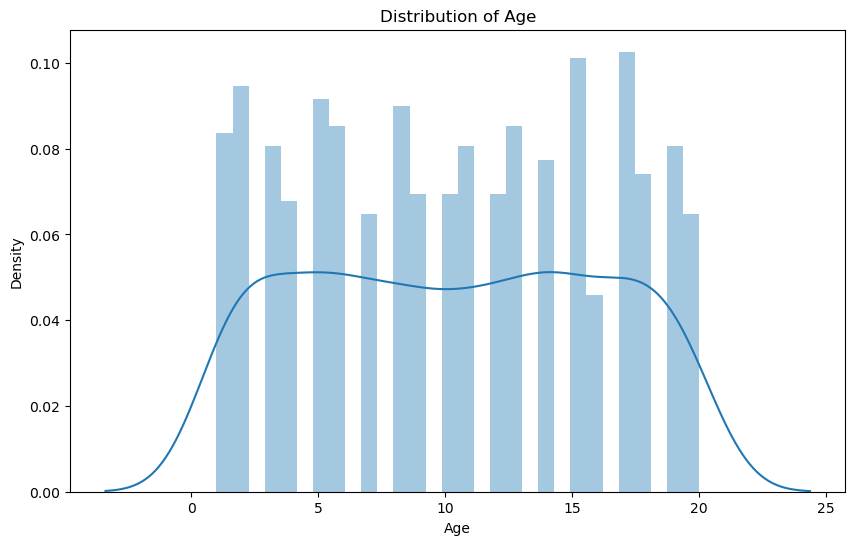

C:\Users\soode\AppData\Local\Temp\ipykernel_22996\2589578545.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], bins=30)


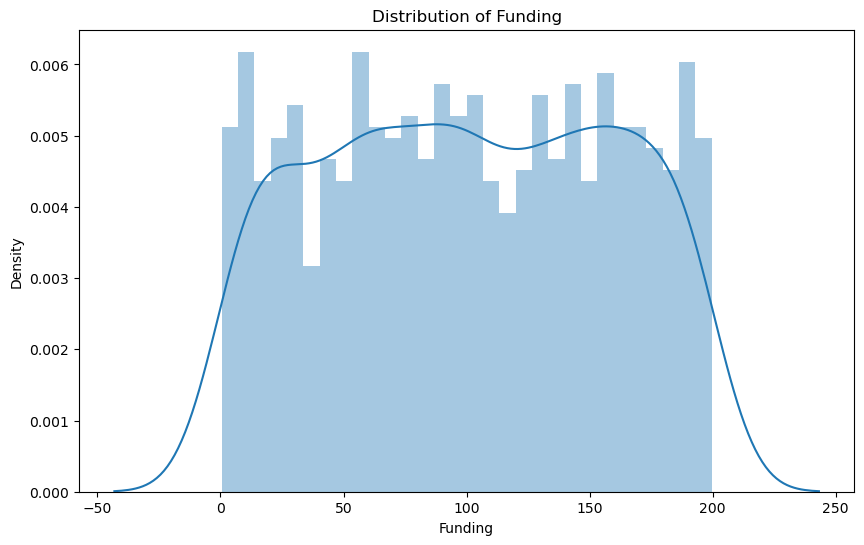

C:\Users\soode\AppData\Local\Temp\ipykernel_22996\2589578545.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], bins=30)


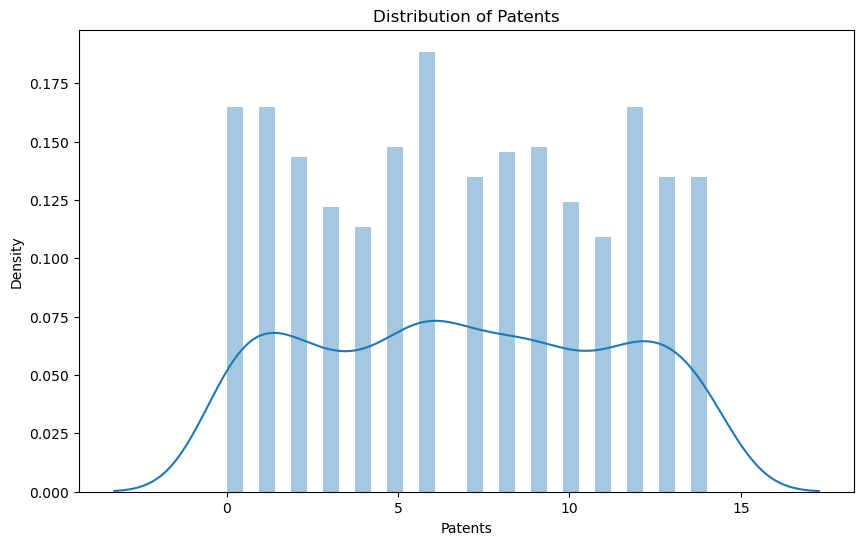

C:\Users\soode\AppData\Local\Temp\ipykernel_22996\2589578545.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], bins=30)


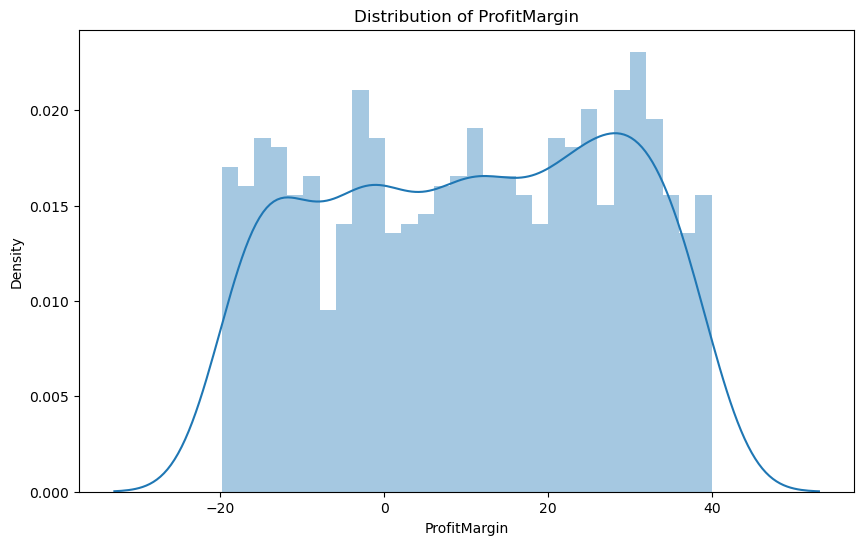

C:\Users\soode\AppData\Local\Temp\ipykernel_22996\2589578545.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], bins=30)


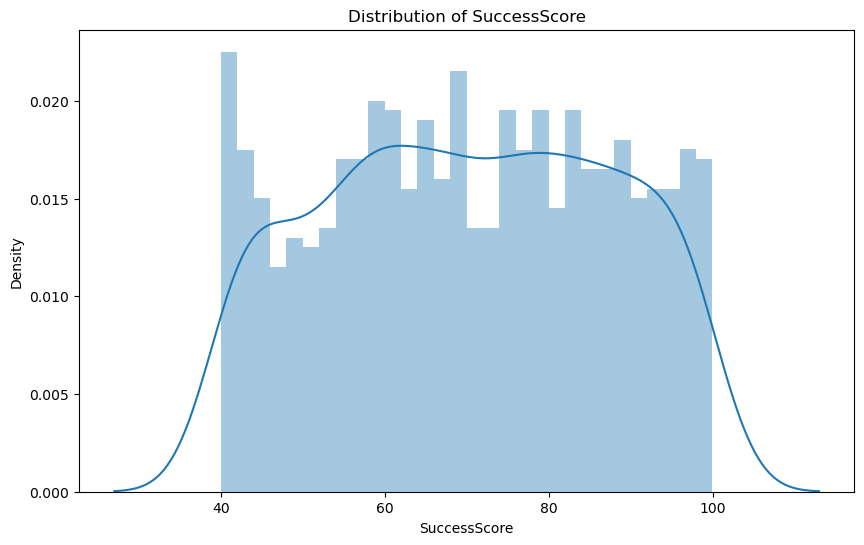

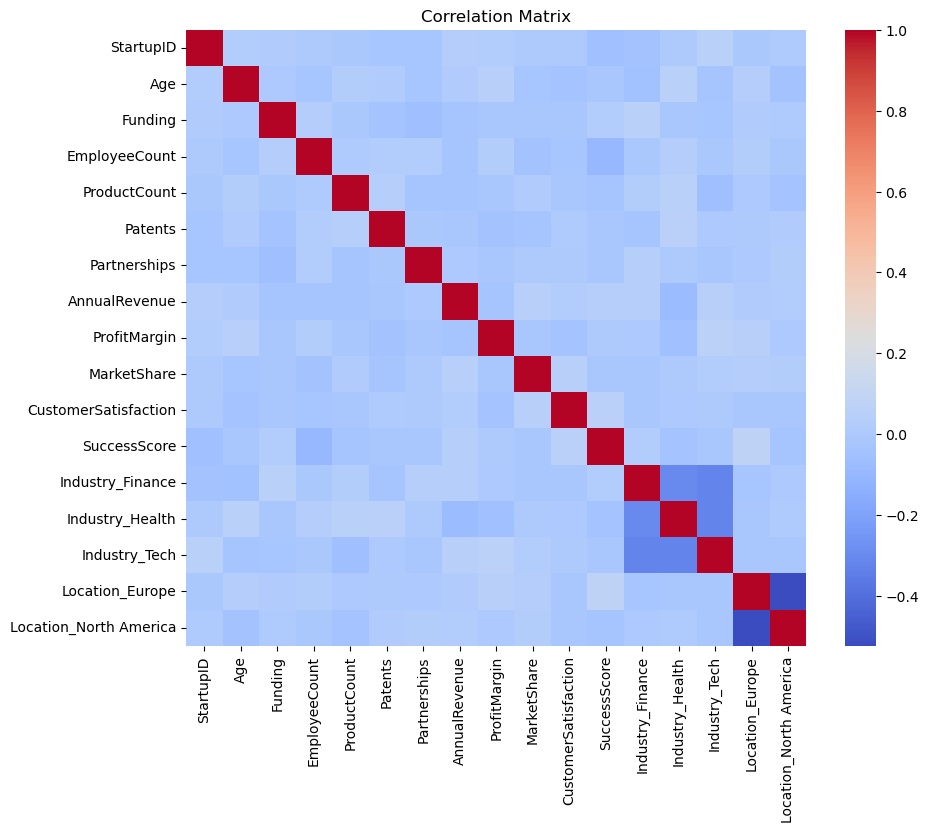

In [20]:
# Visualize the distribution of key features and the target variable
features = ['Age', 'Funding', 'Patents', 'ProfitMargin','SuccessScore']  # Replace with your actual feature names
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.distplot(df[feature], bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Part1 Task C - Feature Engineering and PCA (10 pts)

1. Split the data into training and testing sets with 8:2 ratio and standardize the feature set.
2. Plot the explained variance ratio of the principal components and determine the number of components to retain 80% of variance.
3. Apply PCA using the number found in the previous step to reduce the feature size.

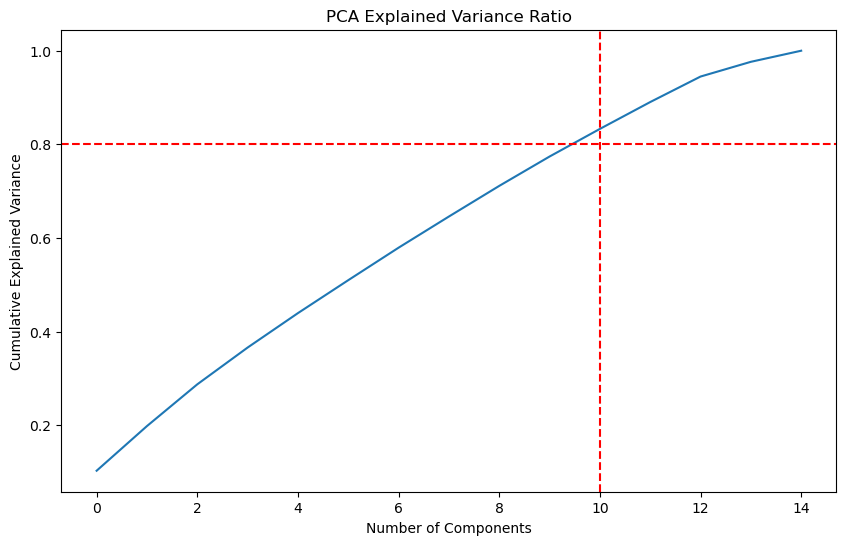

Number of components to retain 80% variance: 11


In [22]:
# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaling for the test set

# Apply PCA to the TRAIN set to determine the number of components for 80% variance
pca = PCA().fit(X_train_scaled)

# 2. Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Ratio')
plt.axhline(y=0.80, color='r', linestyle='--')
plt.axvline(x=np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.80)[0][0], color='r', linestyle='--')
plt.show()

# Determine the number of components to retain 80% of variance
components_80_var = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.80)[0][0] + 1

# 3. Apply PCA with the determined number of components
pca = PCA(n_components=components_80_var)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Apply the same transformation to the test set

print(f'Number of components to retain 80% variance: {components_80_var}')

### Part1 Task D - MLP for Regression  (15 pts)

1. Design and train two MLP regressors for 100 epochs and batch size 32 using 3 fold cross validation:
- Model 1 without hidden layer 
- Model 2 with 1 hidden layer of size 50 neurons 

Incorporate L2 regularization in models, use Adam optimizer with a learning rate of 0.01 and Relu activation function in hidden layer.

2. Evaluate the model's performance on the test set using Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics. 
3. **Written Answer** Compare the models 1 and 2 and write your conclusion.

In [25]:
# Function to create MLP model according to specifications
def create_mlp(hidden_layer_sizes=None):
    model = Sequential()
    if hidden_layer_sizes:
        # Adding one hidden layer with specified size and L2 regularization
        model.add(Dense(hidden_layer_sizes, input_dim=X_train_pca.shape[1],
                        activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='linear'))  # Output layer
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='mean_squared_error')
    return model


def cross_validate_mlp(model_constructor, X, y, folds=3):
    kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
    mae_scores = []
    mse_scores = []

    for train, test in kfold.split(X, y):
        model = model_constructor()
        model.fit(X[train], y[train], epochs=100, batch_size=32, verbose=0)
        y_pred = model.predict(X[test]).flatten()
        mae_scores.append(mean_absolute_error(y[test], y_pred))
        mse_scores.append(mean_squared_error(y[test], y_pred))
    
    return model

# Prepare the data (assuming X_train_pca and y_train are already defined and properly preprocessed)

# Model 1: Without hidden layer
model_1 = cross_validate_mlp(lambda: create_mlp(), X_train_pca, y_train.values)

# Model 2: With one hidden layer of size 50 neurons
model_2 = cross_validate_mlp(lambda: create_mlp(hidden_layer_sizes=50), X_train_pca, y_train.values)


# Predictions on test set for Model 1 (without hidden layer)
y_pred_test_m1 = model_1.predict(X_test_pca)

# Predictions on test set for Model 2 (with one hidden layer of 50 neurons)
y_pred_test_m2 = model_2.predict(X_test_pca)

# Calculate and print the MSE and MAE for Model 1 on test set
mse_test_m1 = mean_squared_error(y_test, y_pred_test_m1)
mae_test_m1 = mean_absolute_error(y_test, y_pred_test_m1)
print(f"Model 1 - Test MSE: {mse_test_m1:.4f}, Test MAE: {mae_test_m1:.4f}")

# Calculate and print the MSE and MAE for Model 2 on test set
mse_test_m2 = mean_squared_error(y_test, y_pred_test_m2)
mae_test_m2 = mean_absolute_error(y_test, y_pred_test_m2)
print(f"Model 2 - Test MSE: {mse_test_m2:.4f}, Test MAE: {mae_test_m2:.4f}")


7/7 [==============================] - 0s 924us/step
Model 1 - Test MSE: 3399.0754, Test MAE: 55.5945
Model 2 - Test MSE: 358.2869, Test MAE: 15.9078


**Place holder for Written Answer**

Model 1 Results: MAE of 55.59 and MSE of 3399.07 suggest that the model's predictions are, on average, 54.21 units away from the actual values, and the square of these errors, on average, is 3247.48. These values indicate a relatively poor performance, which might be due to the model's simplicity not capturing the complexities of the dataset.

Model 2 Results: MAE of 15.90 and MSE of 358.28 are significantly lower than those of Model 1. This substantial improvement in both metrics suggests that Model 2, with its additional complexity (a hidden layer of 50 neurons), is much better at capturing the underlying patterns in the data, leading to more accurate predictions.

### Part1 TaskE - Gridsearch for Hyperparameter Optimization (HPO) (20 pts)

1. Define a range of potential values for hyperparameters as follows:
    - `hidden_layer_sizes`:50, 100, 150
    - `activation`: tanh','relu'
    - `learning rate`: 0.0001, 0.001, 0.01
    
2. Use GridSearchCV to find the best hyperparameter values based on 3 fold cross-validation on MLP model2 from TaskD.
3. Retrain the model using the optimized hyperparameters and evaluate its performance.

In [6]:
# Define the model creation function
def create_model(hidden_layer_sizes, activation, learning_rate):
    model = Sequential([
        Dense(hidden_layer_sizes, input_shape=(X_train_pca.shape[1],), activation=activation),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Define hyperparameters to tune
hidden_layer_sizes = [50, 100, 150]
activations = ['tanh', 'relu']
learning_rates = [0.0001, 0.001, 0.01]

# Manual grid search setup
best_score = np.inf
best_params = {}

# Manual 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for size in hidden_layer_sizes:
    for activation in activations:
        for lr in learning_rates:
            scores = []
            for train_index, test_index in kf.split(X_train_pca):
                X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[test_index]
                y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]
                
                model = create_model(hidden_layer_sizes=size, activation=activation, learning_rate=lr)
                model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)
                
                # Evaluate the model on the validation fold
                scores.append(model.evaluate(X_val_fold, y_val_fold, verbose=0))
            
            # Update best score and parameters if current configuration is better
            avg_score = np.mean(scores)
            if avg_score < best_score:
                best_score = avg_score
                best_params = {'hidden_layer_sizes': size, 'activation': activation, 'learning_rate': lr}

print("Best Score:", best_score)
print("Best Parameters:", best_params)

# Retrain the model using the best parameters found
best_model = create_model(best_params['hidden_layer_sizes'], best_params['activation'], best_params['learning_rate'])
best_model.fit(X_train_pca, y_train, epochs=100, batch_size=32, verbose=0)

# Final evaluation on the test set
y_pred = best_model.predict(X_test_pca).flatten()
final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)

print("Final MSE:", final_mse)
print("Final MAE:", final_mae)

Best Score: 293.94959513346356
Best Parameters: {'hidden_layer_sizes': 100, 'activation': 'tanh', 'learning_rate': 0.001}
7/7 [==============================] - 0s 831us/step
Final MSE: 302.28113906461425
Final MAE: 14.64157658773997



## Part 2 - Binary Classification with a Custom MLP (35 pts)

### Background

You are provided with a schematic of a simple Multilayer Perceptron (MLP) neural network designed for binary classification. This network consists of an input layer with two binary inputs, $x_1$ and $x_2$, a hidden layer with two neurons, $h_1$ and $h_2$, and one output neuron, $y$. The weights and biases are pre-defined as follows:
- Weights from the input to hidden layer: $w_{11} = 20, w_{12} = -20, w_{21} = 20, w_{22} = -20$
- Biases for the hidden layer neurons: $b_{1} = -10, b_{2} = 30$
- Weights from the hidden layer to the output layer are both $20$.
- The bias for the output neuron is $-30$.


<img src="Picture1.png" width=300 height=300 />



### Objective
Implement a Python program that simulates the described MLP network's forward pass and computes the output for different input combinations.



### Part2 Task A -  Sigmoid Activation Function (20 pts)
Write a function that takes binary inputs $x_1$ and $x_2$ and computes the output $y$ using a sigmoid activation function for both the hidden and output layers.
Calculate and print the predicted output for the following input pairs: (0,0), (0,1), (1,0), (1,1). Round the output to the nearest integer.


In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_pass_sigmoid(x1, x2):
    # Define weights and biases
    w11, w12, w21, w22 = 20, -20, 20, -20
    b1, b2 = -10, 30
    w_output = 20  # Assuming both weights are the same for simplicity
    b_output = -30

    # Compute activations for hidden layer
    h1 = sigmoid(w11 * x1 + w21 * x2 + b1)
    h2 = sigmoid(w12 * x1 + w22 * x2 + b2)

    # Compute output
    y = sigmoid(w_output * h1 + w_output * h2 + b_output)

    # Round output to nearest integer
    return round(y)

# Test the function with given input pairs
input_pairs = [(0, 0), (0, 1), (1, 0), (1, 1)]
outputs_sigmoid = [forward_pass_sigmoid(x1, x2) for x1, x2 in input_pairs]
print("Outputs with Sigmoid Activation:", outputs_sigmoid)

Outputs with Sigmoid Activation: [0, 1, 1, 0]



### Part2 Task B - Linear Activation Function (10 pts)
Modify the function from TaskA to use a linear activation function instead of the sigmoid.
Calculate and print the predicted output for the same input pairs as above.


In [8]:
def linear_activation(x):
    return x

def forward_pass_linear(x1, x2):
    # Define weights and biases
    w11, w12, w21, w22 = 20, -20, 20, -20
    b1, b2 = -10, 30
    w_output = 20  # Assuming both weights are the same for simplicity
    b_output = -30

    # Compute activations for hidden layer using linear activation
    h1 = linear_activation(w11 * x1 + w21 * x2 + b1)
    h2 = linear_activation(w12 * x1 + w22 * x2 + b2)

    # Compute output using linear activation
    y = linear_activation(w_output * h1 + w_output * h2 + b_output)

    # Round output to nearest integer
    return round(y)

# Test the function with given input pairs
outputs_linear = [forward_pass_linear(x1, x2) for x1, x2 in input_pairs]
print("Outputs with Linear Activation:", outputs_linear)

Outputs with Linear Activation: [370, 370, 370, 370]



### Part2 TaskC - Hidden Neuron operation (3 pts)
Analyze the function of the hidden neuron $h_{1}$ when using a sigmoid activation function. Discuss which logical problem (\(e.g., AND, OR, XOR\)) \$h_{1}$ is solving.


#### Placeholder for Task C answer
With the given weights and biases, and using the sigmoid activation function:

The first hidden neuron (ℎ₁) is activated strongly (towards 1) when at least one of the inputs is 1 due to its bias of -10 and the positive weights and 0 when inputs are 0. This configuration resembles an OR operation.


### Part2 Task D - MLP operation (2 pts)
Consider the entire network with a sigmoid activation function. Discuss which logical problem the MLP is designed to solve considering the weights and biases configuration.




#### Placeholder for Task D answer
Considering the entire network with sigmoid activation:

The network is designed to output a 1 (true) for input combinations (0,1) and (1,0), and 0 (false) for inputs (0,0) and (1,1), based on the described weights, biases, and using sigmoid activation. This configuration solves the XOR (exclusive OR) problem, which is true if either, but not both, inputs are true. The output is false if both inputs are "false" or if both inputs are true. Similarly, the output is 1 if the inputs are different but 0 if the inputs are the same. The MLP through its hidden layer and output neuron configuration effectively models the non-linear XOR logical operation, which single-layer perceptrons cannot solve.

## Part 3 - Convolutional Neural Network (CNN) - (15 Bonus pts)

### Objective:
Develop a Convolutional Neural Network (CNN) model to classify handwritten digits from the MNIST dataset. Your tasks involve loading and preprocessing the dataset, designing a CNN architecture, training the model while reserving a portion of the data for validation, and evaluating the model's performance. Additionally, assess if the model exhibits overfitting through the analysis of learning curves.


### Part3 TaskA - Image Classification (20 pts)
1. Load the MNIST Dataset which consists of grayscale images of handwritten digits. Normalize the image pixel values to a range of [0, 1], reshape the images to fit the CNN input requirements and convert the labels to one-hot encoded vectors for classification.
2. Design a CNN architecture for classifying MNIST handwritten digits with input layer of 28x28 pixel grayscale images, followed by three convolutional layers with ReLU activation (the first with 32 filters of size 3x3, the second with 64 filters of size 3x3 plus a max pooling layer of size 2x2, and the third also with 64 filters of size 3x3 followed by another max pooling layer of size 2x2). After these, a flatten layer transitions the output to a 1D vector, leading to a dense layer with 64 units (ReLU activation), and culminating in an output layer with 10 units for the 10 digit classes (0-9) using softmax activation. 
3. Keep 20% of MNIST training dataset for validation and train the CNN on the remaining part of MNIST training dataset.
4. Plot the learning curves.
5. **Written Answer** Explain whether the model overfits or not.
5. Evaluate the model's accuracy and F1-score on the MNIST test dataset. 



Epoch 1/10

750/750 [==============================] - 5s 5ms/step - loss: 0.2216 - accuracy: 0.9325 - val_loss: 0.0862 - val_accuracy: 0.9737
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0621 - accuracy: 0.9807 - val_loss: 0.0527 - val_accuracy: 0.9841
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0529 - val_accuracy: 0.9845
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0345 - accuracy: 0.9895 - val_loss: 0.0502 - val_accuracy: 0.9854
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.0388 - val_accuracy: 0.9879
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0399 - val_accuracy: 0.9877
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0446 - val_accuracy: 0.9870
Epo

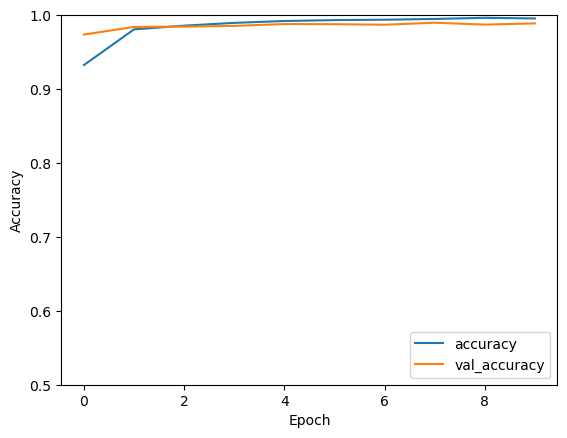

313/313 - 0s - loss: 0.0349 - accuracy: 0.9904 - 448ms/epoch - 1ms/step
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test accuracy: 0.9904000163078308


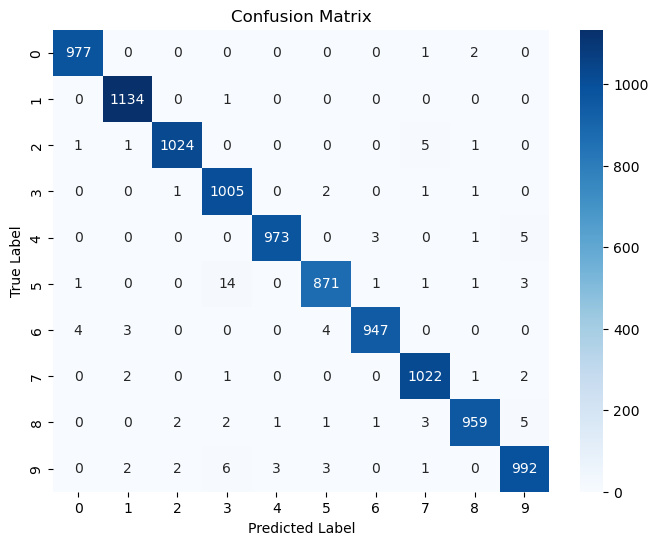

In [9]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to [0, 1] range
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reshape images to fit the CNN input requirement
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=64)


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()



# Evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

# Calculate F1-score and other metrics
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)
print(classification_report(true_labels, predicted_labels))

# Accuracy
print("Test accuracy:", test_acc)


#Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Place holder for Written Answer**
We typically look for a significant divergence between the training and validation performance: overfitting is indicated when the training accuracy continues to improve or remains high while the validation accuracy starts to decrease or plateaus early.

In the provided graph, both the training accuracy (blue line) and validation accuracy (orange line) are plotted against epochs. The lines are almost overlapping and remain close together throughout the training process. The validation accuracy closely tracks the training accuracy, and both seem to plateau at a high level without any significant divergence. This behavior suggests that the model is not overfitting; instead, it generalizes well to the validation data.

However, the graph does show signs of an early plateau, which could mean that the model quickly reached its optimal performance and further training might not lead to significant improvements. 